In [28]:
!pip3 install matplotlib pandas

     |████████████████████████████████| 11.6 MB 5.1 MB/s eta 0:00:01    |████████▋                       | 3.1 MB 2.3 MB/s eta 0:00:04
     |████████████████████████████████| 1.2 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 9.8 MB/s eta 0:00:01


In [37]:
import json
import pandas as pd
import matplotlib
import requests

In [95]:
!rm products.json
!node amazon-product-api/bin/cli.js products --random-ua --filetype=json --keyword="flash drive usb 3.0 128gb" -n 50
!bash -c 'for f in products*.json; do mv "$f" products.json; done'

⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Found 33 products⠧ Found 55 products⠇ Found 74 products⠏ Found 96 productsResult was saved to: products(flash drive usb 3.0 128gb)_1610173546410


In [96]:
products_dict = None
with open('products.json') as f:
  products_dict = json.load(f)
len(products_dict), products_dict[0]

(84,
 {'position': {'page': 1, 'position': 1, 'global_position': 1},
  'asin': 'B08QVJ8JNQ',
  'price': {'discounted': False,
   'current_price': 41.99,
   'currency': 'USD',
   'before_price': 0,
   'savings_amount': 0,
   'savings_percent': 0},
  'reviews': {'total_reviews': 353, 'rating': 4.4},
  'url': 'https://www.amazon.com/dp/B08QVJ8JNQ',
  'score': '1553.20',
  'sponsored': False,
  'amazonChoice': False,
  'bestSeller': False,
  'amazonPrime': True,
  'title': 'Sponsored Ad - USB Flash Drive 1TB, F-Security 1TB Thumb Drive 1000GB Memory Stick Compatible with Computer/Laptop',
  'thumbnail': 'https://m.media-amazon.com/images/I/41w5nAjz7GL._AC_UY218_.jpg'})

In [97]:
products_df = pd.json_normalize(products_dict)
products_df.iloc[0]

asin                                                               B08QVJ8JNQ
url                                      https://www.amazon.com/dp/B08QVJ8JNQ
score                                                                 1553.20
sponsored                                                               False
amazonChoice                                                            False
bestSeller                                                              False
amazonPrime                                                              True
title                       Sponsored Ad - USB Flash Drive 1TB, F-Security...
thumbnail                   https://m.media-amazon.com/images/I/41w5nAjz7G...
position.page                                                               1
position.position                                                           1
position.global_position                                                    1
price.discounted                                                

In [98]:
products_df = products_df[["title", "price.current_price", "reviews.rating", "reviews.total_reviews", "url","asin"]]
products_df

,title,price.current_price,reviews.rating,reviews.total_reviews,url,asin
0,"Sponsored Ad - USB Flash Drive 1TB, F-Security...",41.99,4.4,353,https://www.amazon.com/dp/B08QVJ8JNQ,B08QVJ8JNQ
1,Sponsored Ad - WANSENDA OTG Type C & USB 3.0 /...,10.99,4.3,383,https://www.amazon.com/dp/B0823QLYDC,B0823QLYDC
2,HP 128GB x900w USB 3.0 Flash Drive,16.99,4.5,4758,https://www.amazon.com/dp/B077BGMX8C,B077BGMX8C
3,SanDisk - SDCZ73-128G-G46 128GB Ultra Flair US...,18.21,4.6,63552,https://www.amazon.com/dp/B015CH1PJU,B015CH1PJU
4,Samsung BAR Plus USB 3.1 Flash Drive 128GB - 3...,19.99,4.7,22781,https://www.amazon.com/dp/B07BPK3XWW,B07BPK3XWW
...,...,...,...,...,...,...
79,"Flash Drive Compatible iPhone, Photo Stick 128...",23.99,4.1,475,https://www.amazon.com/dp/B088LTP89C,B088LTP89C
80,USB Flash Drive 3.0 for iPhone X XR XS MAX USB...,29.99,4.2,73,https://www.amazon.com/dp/B07T2V8K4T,B07T2V8K4T
81,SanDisk 128GB Cruzer Glide USB 2.0 Flash Drive...,16.95,4.7,28963,https://www.amazon.com/dp/B007YX9OGW,B007YX9OGW
82,KOOTION 5 X 32GB USB 3.0 Flash Drives 32gb Fla...,22.99,4.5,3756,https://www.amazon.com/dp/B07L2X8DP5,B07L2X8DP5


In [99]:
products_df = products_df[products_df["reviews.total_reviews"] > 100]

<AxesSubplot:xlabel='price.current_price', ylabel='reviews.rating'>

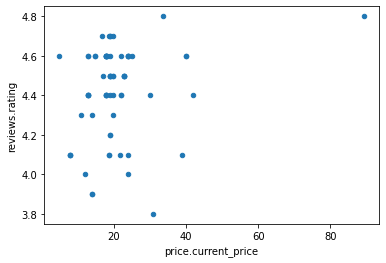

In [100]:
products_df.plot.scatter(x="price.current_price",y="reviews.rating")

In [101]:
products_df = products_df[products_df["price.current_price"] < 25]
products_df

,title,price.current_price,reviews.rating,reviews.total_reviews,url,asin
1,Sponsored Ad - WANSENDA OTG Type C & USB 3.0 /...,10.99,4.3,383,https://www.amazon.com/dp/B0823QLYDC,B0823QLYDC
2,HP 128GB x900w USB 3.0 Flash Drive,16.99,4.5,4758,https://www.amazon.com/dp/B077BGMX8C,B077BGMX8C
3,SanDisk - SDCZ73-128G-G46 128GB Ultra Flair US...,18.21,4.6,63552,https://www.amazon.com/dp/B015CH1PJU,B015CH1PJU
4,Samsung BAR Plus USB 3.1 Flash Drive 128GB - 3...,19.99,4.7,22781,https://www.amazon.com/dp/B07BPK3XWW,B07BPK3XWW
5,Silicon Power 2 Pack 128GB USB 3.0/3.1 Gen1 US...,19.95,4.5,1636,https://www.amazon.com/dp/B07Q5HMXTN,B07Q5HMXTN
...,...,...,...,...,...,...
78,"Gigastone Z90 128GB USB 3.1 Flash Drive, Mini ...",17.99,4.4,656,https://www.amazon.com/dp/B07NS1Y9K3,B07NS1Y9K3
79,"Flash Drive Compatible iPhone, Photo Stick 128...",23.99,4.1,475,https://www.amazon.com/dp/B088LTP89C,B088LTP89C
81,SanDisk 128GB Cruzer Glide USB 2.0 Flash Drive...,16.95,4.7,28963,https://www.amazon.com/dp/B007YX9OGW,B007YX9OGW
82,KOOTION 5 X 32GB USB 3.0 Flash Drives 32gb Fla...,22.99,4.5,3756,https://www.amazon.com/dp/B07L2X8DP5,B07L2X8DP5


In [102]:
products_df = products_df[products_df.title.str.contains("128G")]
products_df

,title,price.current_price,reviews.rating,reviews.total_reviews,url,asin
1,Sponsored Ad - WANSENDA OTG Type C & USB 3.0 /...,10.99,4.3,383,https://www.amazon.com/dp/B0823QLYDC,B0823QLYDC
2,HP 128GB x900w USB 3.0 Flash Drive,16.99,4.5,4758,https://www.amazon.com/dp/B077BGMX8C,B077BGMX8C
3,SanDisk - SDCZ73-128G-G46 128GB Ultra Flair US...,18.21,4.6,63552,https://www.amazon.com/dp/B015CH1PJU,B015CH1PJU
4,Samsung BAR Plus USB 3.1 Flash Drive 128GB - 3...,19.99,4.7,22781,https://www.amazon.com/dp/B07BPK3XWW,B07BPK3XWW
5,Silicon Power 2 Pack 128GB USB 3.0/3.1 Gen1 US...,19.95,4.5,1636,https://www.amazon.com/dp/B07Q5HMXTN,B07Q5HMXTN
6,USB 3.0 128GB Metal Flash Drive Up to 90MB/s F...,18.99,4.4,505,https://www.amazon.com/dp/B08BYH5Y1X,B08BYH5Y1X
7,SanDisk 128GB Ultra USB 3.0 Flash Drive - SDCZ...,18.75,4.7,56050,https://www.amazon.com/dp/B00P8XQPY4,B00P8XQPY4
9,Flash Drive 128GB 3.0 USB Drive Thumb Drive Ph...,14.88,4.6,4316,https://www.amazon.com/dp/B08MB9G2GM,B08MB9G2GM
10,"USB Flash Drive 128G, USB Memory Stick 128GB J...",18.88,4.1,253,https://www.amazon.com/dp/B087JRYMPS,B087JRYMPS
11,128GB USB 2.0 Flash Drive 2 Pack 128 GB Thumb ...,19.99,4.5,3199,https://www.amazon.com/dp/B07VQR5MPN,B07VQR5MPN


In [103]:
def fetch_review_meta(asin):
    return requests.get("https://reviewmeta.com/api/amazon/" + asin).json()

review_meta_dict = {asin : fetch_review_meta(asin) for asin in products_df["asin"]}
next(iter(review_meta_dict.values()))

{'rating': '',
 's_overall': '',
 'href': 'https://reviewmeta.com/amazon/B0823QLYDC',
 'count': ''}

In [106]:
# Update the review columns if we have verified reviews
has_reviews = [k for k,v in review_meta_dict.items() if v['rating'] != '']
print(has_reviews)
products_df.loc[products_df["asin"].isin(has_reviews), "reviews.rating"] = products_df["asin"].map({k : v["rating"] for k, v in review_meta_dict.items()})
products_df['reviews.rating'] = products_df['reviews.rating'].astype(float)
products_df.loc[products_df["asin"].isin(has_reviews), "reviews.total_reviews"] = products_df["asin"].map({k : v["count"] for k, v in review_meta_dict.items()})
products_df['reviews.total_reviews'] = products_df['reviews.total_reviews'].astype(int)
products_df = products_df[products_df["reviews.total_reviews"] > 100]
products_df = products_df[products_df["reviews.rating"] > 4.3]
products_df

['B077BGMX8C', 'B015CH1PJU', 'B07BPK3XWW', 'B07Q5HMXTN', 'B00P8XQPY4', 'B08MB9G2GM', 'B07VQR5MPN', 'B07DW2PJ9F', 'B07FFTHGS1', 'B07VLB1C8K', 'B07JW5TPCV', 'B01LFV52T6', 'B07855LJ99', 'B07XBDLJN2', 'B00FE2N1WS', 'B08BPC4B8C', 'B07SYB38Q8', 'B07L9PWH9K', 'B07YWP4B65', 'B016BEPP9O', 'B0868K7627', 'B07NS1Y9K3', 'B088LTP89C', 'B007YX9OGW']


/home/rsen/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-106-f72a91f6d6e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['reviews.rating'] = products_df['reviews.rating'].astype(float)
<ipython-input-106-f72a91f6d6e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,title,price.current_price,reviews.rating,reviews.total_reviews,url,asin
6,USB 3.0 128GB Metal Flash Drive Up to 90MB/s F...,18.99,4.4,505,https://www.amazon.com/dp/B08BYH5Y1X,B08BYH5Y1X
13,Sponsored Ad - 128GB USB 3.0 Flash Drive with ...,18.99,4.5,108,https://www.amazon.com/dp/B08BHYNXLM,B08BHYNXLM
19,TEAMGROUP C145 128GB USB 3.2 Gen 1 (3.1/3.0) F...,12.99,4.6,519,https://www.amazon.com/dp/B014W286DE,B014W286DE
29,"128GB USB 3.0 Flash Drive, Techkey F90 Pen Dri...",19.99,4.4,2516,https://www.amazon.com/dp/B07JW5TPCV,B07JW5TPCV
30,"128GB USB 3.0 Flash Drive with LED, Moreslan W...",18.99,4.5,108,https://www.amazon.com/dp/B08BHYNXLM,B08BHYNXLM
42,Sponsored Ad - Gigastone Z60 128GB USB 3.1 Fla...,12.99,4.4,102,https://www.amazon.com/dp/B08B38S4C5,B08B38S4C5
45,Sponsored Ad - Gigastone Z60 128GB USB 3.1 Fla...,12.99,4.4,102,https://www.amazon.com/dp/B08B38S4C5,B08B38S4C5
48,DIDIVO USB 3.0 Flash Drive 128GB Thumb Drive 3...,21.99,4.4,266,https://www.amazon.com/dp/B08NK2LNMJ,B08NK2LNMJ
50,SanDisk 128GB Ultra Loop USB 3.0 Flash Drive -...,18.99,4.5,208,https://www.amazon.com/dp/B07L9PWH9K,B07L9PWH9K
53,TEAMGROUP C145 128GB USB 3.2 Gen 1 (3.1/3.0) F...,12.99,4.6,519,https://www.amazon.com/dp/B014W286DE,B014W286DE


<AxesSubplot:xlabel='reviews.rating', ylabel='reviews.total_reviews'>

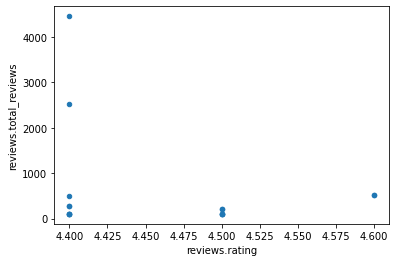

In [107]:
products_df.plot.scatter(x="reviews.rating",y="reviews.total_reviews")

In [109]:
products_df = products_df[products_df["reviews.total_reviews"] > 2000]
products_df

,title,price.current_price,reviews.rating,reviews.total_reviews,url,asin
29,"128GB USB 3.0 Flash Drive, Techkey F90 Pen Dri...",19.99,4.4,2516,https://www.amazon.com/dp/B07JW5TPCV,B07JW5TPCV
81,SanDisk 128GB Cruzer Glide USB 2.0 Flash Drive...,16.95,4.4,4454,https://www.amazon.com/dp/B007YX9OGW,B007YX9OGW


In [112]:
asin = products_df["asin"].iloc[0]
!node amazon-product-api/bin/cli.js asin $asin --random-ua --filetype=json
!bash -c 'for f in asin*.json; do mv "$f" asin.json; done'

⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper StartedResult was saved to: asin(B07JW5TPCV)_1610174059569


In [114]:
asin_dict = None
with open('asin.json') as f:
    asin_dict = json.load(f)
asin_dict

[{'title': '128GB USB 3.0 Flash Drive, Techkey F90 Pen Drive High Speed Thumb Drive Capless Pendrive Retractable USB Memory Stick Shock Resistant Jump Drive Compact Size',
  'description': '',
  'feature_bullets': ['Fast USB drive: Standard USB 3.0 interface. The transfer rate can be up to 5.0Gb/s theoretically. (Note: Transmission rate will be limited by the hard drive.) Support the high-speed transfer of large files. Backwards compatible with USB 2.0 interface.',
   'Stylish Flash Drive: The case of this USB flash drive is made of aluminum alloy, a combination of brushed metal and ABS material, and undergoes high temperature oxidation treatment. The luxurious and fashionable appearance highlights the ultimate fashion sense.',
   'Safe USB 3.0 Memory Stick: Advanced Class A UDP flash memory chip and high-quality sealing technology ensure this pendrive waterproof, shock proof, dust proof, static proof, magnetic proof, high temperature proof, more stable data storage',
   "Portable Thum

In [115]:
!node amazon-product-api/bin/cli.js reviews $asin --random-ua --filetype=json
!bash -c 'for f in reviews*.json; do mv "$f" reviews.json; done'

⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper Started⠇ Amazon Scraper Started⠏ Amazon Scraper Started⠋ Amazon Scraper Started⠙ Amazon Scraper Started⠹ Amazon Scraper Started⠸ Amazon Scraper Started⠼ Amazon Scraper Started⠴ Amazon Scraper Started⠦ Amazon Scraper Started⠧ Amazon Scraper StartedResult was saved to: reviews(B07JW5TPCV)_1610174175482


In [116]:
reviews_dict = None
with open('reviews.json') as f:
    reviews_dict = json.load(f)
reviews_dict

[{'id': 'RH8P1YK3RHKE6',
  'asin': {'original': 'B07JW5TPCV', 'variant': 'B07JW5TPCV'},
  'review_data': 'Reviewed in the United States on January 6, 2021',
  'date': {'date': 'January 6, 2021', 'unix': 1609916400},
  'name': 'Kevin R. Checo',
  'rating': 5,
  'title': 'Good Product',
  'review': 'This is the best pendrive that i ever had',
  'verified_purchase': True},
 {'id': 'R3NJDEJ223PX7L',
  'asin': {'original': 'B07JW5TPCV', 'variant': 'B07JW5TPCV'},
  'review_data': 'Reviewed in the United States on January 6, 2021',
  'date': {'date': 'January 6, 2021', 'unix': 1609916400},
  'name': 'Peter Nieves',
  'rating': 5,
  'title': 'Easy to use',
  'review': 'Convenient, and portable. Easy to use and the cost looks good for me.',
  'verified_purchase': True},
 {'id': 'R2ZTFFXW01PGL8',
  'asin': {'original': 'B07JW5TPCV', 'variant': 'B07JW5TPCV'},
  'review_data': 'Reviewed in the United States on January 6, 2021',
  'date': {'date': 'January 6, 2021', 'unix': 1609916400},
  'name': '